In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

In [3]:
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))

print("Shape of each image:", x_train[0].shape)

print("Shape of training samples:", x_train.shape)
print("Shape of test samples:", x_test.shape)

Number of training samples: 60000
Number of test samples: 10000
Shape of each image: (28, 28)
Shape of training samples: (60000, 28, 28)
Shape of test samples: (10000, 28, 28)


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
print("Shape of training samples:", x_train.shape)

x_test = x_test.reshape(-1, 28, 28, 1)
print("Shape of test samples:", x_test.shape)

Shape of training samples: (60000, 28, 28, 1)
Shape of test samples: (10000, 28, 28, 1)


In [5]:
model = Sequential()

model.add(Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(10, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)         

In [6]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


1500/1500 [==============================] - 7s 4ms/step - loss: 0.9124 - accuracy: 0.7025 - val_loss: 0.1973 - val_accuracy: 0.9427
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2693 - accuracy: 0.9144 - val_loss: 0.1388 - val_accuracy: 0.9573
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1994 - accuracy: 0.9376 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1631 - accuracy: 0.9480 - val_loss: 0.0891 - val_accuracy: 0.9744
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1419 - accuracy: 0.9554 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1285 - accuracy: 0.9597 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1175 - accuracy: 0.9624 - val_loss: 0.0639 - val_accurac

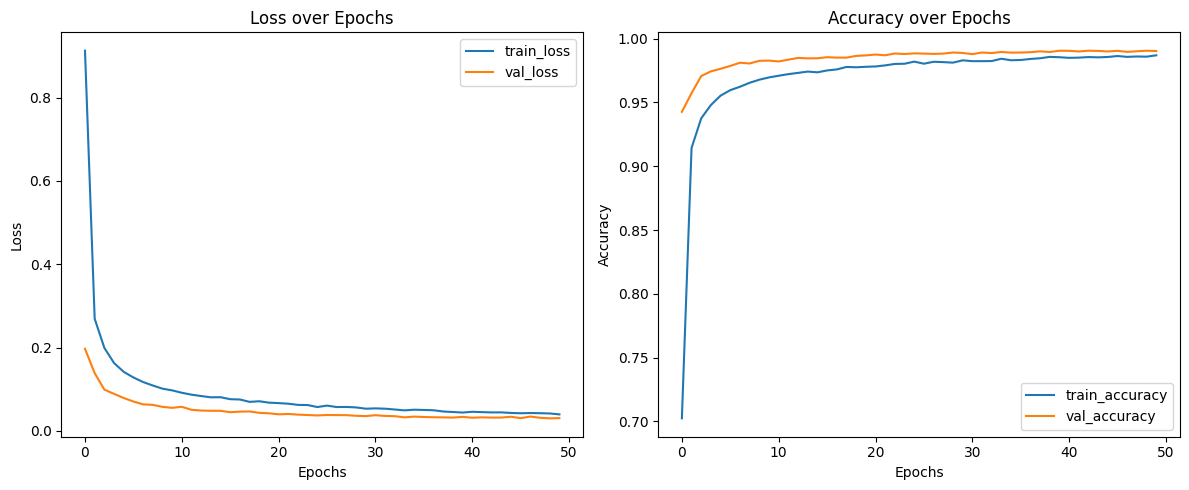

In [11]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1,

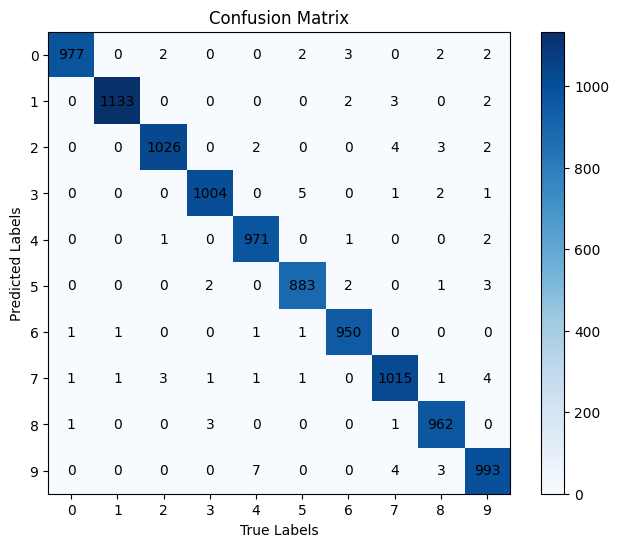

In [20]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)
predicted_classes = [np.argmax(pred) for pred in predictions]
print(predicted_classes)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, str(conf_matrix[i, j]), ha='center', va='center')

plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [10]:
evaluation = model.evaluate(x_test, y_test)

print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0237 - accuracy: 0.9914
Test Loss: 0.02371177077293396
Test Accuracy: 0.9914000034332275
